In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
train = pd.read_csv('9D_titanic/train.csv')

-

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#null값을 찾아서 sum 더해서 보여 준다 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#중앙값을 구한다 
train['Age'].median()

28.0

In [7]:
# 성별에따라 평균 나이를 구하라 
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [8]:
# 성별에 따라 평균나이를 데이터프레임으로 보여주라 as_index = False
train.groupby('Sex', as_index = False )['Age'].mean()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [9]:
# 위에와 차이를 보아라 
train.groupby('Sex' )['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [10]:
#성별에 따라 나이 중앙값을 데이터 프레임으로 보여주라 
train.groupby('Sex', as_index= False)['Age'].median()

,Sex,Age
0,female,27.0
1,male,29.0


In [11]:
# [b].transform(a)  a를 b안에 대입하겠다

In [12]:
#성별에 따라 나이를 중앙값으로 바꾸겠다 데이터프레임으로 보여주라 
train.groupby('Sex',as_index= False)['Age'].transform('median')

,Age
0,29.0
1,27.0
2,27.0
3,27.0
4,29.0
...,...
886,29.0
887,27.0
888,27.0
889,29.0


-

In [13]:
# .copy() 복사 한다 /copy 된 list는 더 이상 원본 list에 영향을 미치지 않는다.
train2 = train.copy()

In [14]:
train2['Age'][-5:]

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [15]:
# .fillna(a) : null값에 a를 넣어 주겠다 
# inplace = Ture : 저장 
# 새로운파일 [] == 블라블라 : 새로운 파일을 만들어서 저장방법 (위아래 동일)

In [16]:
# 나이에 null 값에다가 성별에 따른 나이에 중앙값을 집어 넣겠다 
train2['Age'].fillna(train2.groupby('Sex')['Age'].transform('median'),inplace=True)

In [17]:
train2['Age'][-5:]

886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, dtype: float64

# 정규 표현식

# 정규 표현 식
= .extract('[]') : 추출하다  '[0-9]' 숫자 '[a-zA-Z]' 알파벳모두  [0-9a-zA-Z] 둘다모두  
= ('[()]')?!?  
= * 0번이상   
= +최소 1번이상 (공백 문자 뭐든 1개이상)

In [18]:
import pandas as pd

In [19]:
import numpy as np

In [20]:
train = pd.read_csv('9D_titanic/train.csv')

-

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
# train['Title'] = Mr. Mrs. Miss.Other 로 이름을 새로 저장할거임 
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [23]:
# 이름에서 모든 스펠링 1자리와, 콤마 까지 추출 하시오 
train['Name'].str.extract('([a-zA-z]+,)')

,0
0,"Braund,"
1,"Cumings,"
2,"Heikkinen,"
3,"Futrelle,"
4,"Allen,"
...,...
886,"Montvila,"
887,"Graham,"
888,"Johnston,"
889,"Behr,"


In [24]:
# 이름에서 모든스펠링 1자리만 추출하시오 
train['Name'].str.extract('([a-zA-Z]+)')

,0
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [25]:
# 정규표현식의 많음 함축어중 
# Dot . 라는게 있음 
# 추출하고 싶은 단어에 . 점이 있다며 중복되니 \ 역슬래시를 사용해서 분리할수 있음

In [26]:
# 이름에서 . 앞에 글자만 추출해서 새로운 파일에 저장
train['Title'] = train['Name'].str.extract('([a-zA-Z]+)\.')

In [27]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [28]:
train['Name'].str.extract('\(([A-Za-z ]+)\)')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [29]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
# 정규 표현에서 공백도 포함해야함 꼭 주의 !
train['Name'].str.extract('[(]([a-zA-Z ]*)[)]')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [31]:
train['Name'].str.extract('[(]([a-zA-Z ]+)[)]')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [32]:
# Mr 0 Miss 1 Mrs 2 Other 3 으로 바꾸기 

In [33]:
train['Title'] #이름에서 밑에처럼 추출했어 저장함 

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [34]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [35]:
# 대문자 소문자 주의 미리 바꿔주기 
train['Title'] = train['Title'].str.lower()

In [36]:
train['Title']

0        mr
1       mrs
2      miss
3       mrs
4        mr
       ... 
886     rev
887    miss
888    miss
889      mr
890      mr
Name: Title, Length: 891, dtype: object

In [167]:
#1 Mr 0 Miss 1 Mrs 2 Other 3 으로 바꾸기 
#선생님 풀이 
title_map = {}
for value,key  in enumerate(train['Title'].unique()) :
    if value >= 3  :
        title_map[key] = 3
    else :
        title_map[key] = value
        
print(title_map)

{'mr': 0, 'mrs': 1, 'miss': 2, 'master': 3, 'don': 3, 'rev': 3, 'dr': 3, 'mme': 3, 'ms': 3, 'major': 3, 'lady': 3, 'sir': 3, 'mlle': 3, 'col': 3, 'capt': 3, 'countess': 3, 'jonkheer': 3}


In [38]:
#2 Mr 0 Miss 1 Mrs 2 Other 3 으로 바꾸기 
#np.where 로 푸는 방식 
#train['Title'] = np.where(train['Title']== 'mr' , 0,
                 #np.where(train['Title']== 'mrs' , 1,
                #np.where(train['Title'] == 'miss', 2 , 3)))

In [39]:
train['Title'].unique

<bound method Series.unique of 0        mr
1       mrs
2      miss
3       mrs
4        mr
       ... 
886     rev
887    miss
888    miss
889      mr
890      mr
Name: Title, Length: 891, dtype: object>

In [40]:
#3 Mr 0 Miss 1 Mrs 2 Other 3 으로 바꾸기 
def title_map(title) :
    if title == 'mr' :
        return 0 
    elif title == 'miss' :
        return 1
    elif title == 'mrs' :
        return 2
    else :
        return 3
# title_map 을 train['Title'] 적용시켜준다(.apply)
train['Title'].apply(title_map)


0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64

-

In [41]:
train['Title2'] = np.where(train['Title'].str.lower() == 'mr'.lower() , 0,
                  np.where(train['Title'].str.lower() == 'miss'.lower() , 1,
                  np.where(train['Title'].str.lower() == 'mrs'.lower() , 2,3)))

In [42]:
train['Title2']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title2, Length: 891, dtype: int32

-

In [43]:
def title_mapping(title) :
    if title == 'mr' :
        return 0
    elif title == 'miss' :
        return 1
    elif title == 'mrs' :
        return 2
    else :
        return 3
    
train['Title'].apply(title_mapping)

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64

In [44]:
train['Title3'] = train['Title'].apply(title_mapping)

In [45]:
train['Title3']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title3, Length: 891, dtype: int64

In [46]:
train['Title3'].value_counts()

0    517
1    182
2    125
3     67
Name: Title3, dtype: int64

-

## 금요일 오후 

In [47]:
train['Title2']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title2, Length: 891, dtype: int32

In [48]:
train['Title2'].unique()

array([0, 2, 1, 3])

In [49]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title2',
       'Title3'],
      dtype='object')

In [50]:
#타이틀 2 그룹의 나이의 중앙값을 구하라 

In [51]:
train.groupby('Title2')['Age'].median()

Title2
0    30.0
1    21.0
2    35.0
3     9.0
Name: Age, dtype: float64

In [52]:
train['Age'].isnull().sum()

177

In [53]:
#나이 중앙값 나이 null값에 집어 넣기 

In [54]:
# [b].transform(a)  a를 b안에 대입하겠다
train['Age'].fillna(train.groupby('Title2')['Age'].transform('median'),inplace= True)

In [55]:
train['Age'].isnull().sum()

0

In [56]:
train['Age'].median()

30.0

In [57]:
train['Age'].mean()

29.372805836139168

In [58]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [59]:
# describe():데이터 프레임 컬럼별 카운트, 평균, 표준편차, 최소값, 4분위 수, 최대값을 보여줍니다.
train['Age'].describe()

count    891.000000
mean      29.372806
std       13.227346
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

-

In [60]:
### 그래프 만들기 

In [61]:
import seaborn as sns

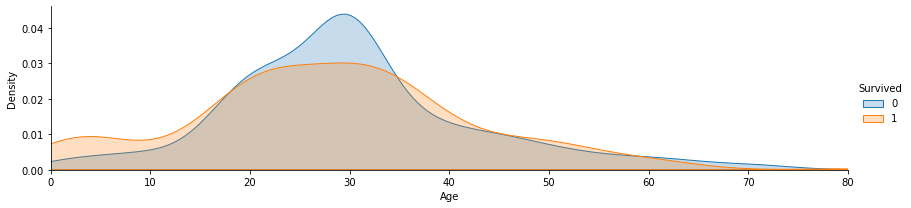

In [62]:
#'Survived': 생존자  죽음 파랑색 생존 주황색
# .FacetGrid() :  FacetGrid에 데이터프레임과 구분할 row, col, hue 등을 전달해 객체 생성
# .kdeplot : seaborn의 경우 kedplot기능을 사용하여 밀도 플롯을 그릴수 있다.
# shade = True : 음영추가 
# .add_legend() : 범례를 추가 합니다
facet = sns.FacetGrid(train, hue = 'Survived' , aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

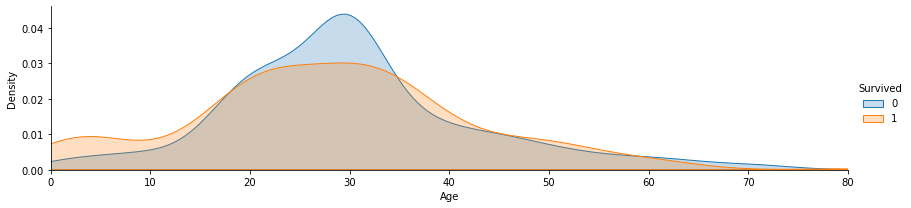

In [63]:
facet = sns.FacetGrid(train, hue = 'Survived' , aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend();

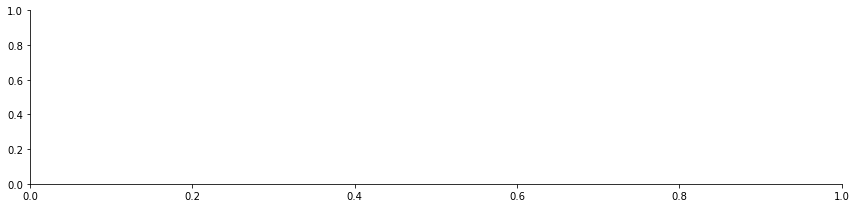

In [64]:
facet = sns.FacetGrid(train, hue = 'Survived' , aspect = 4)

-

In [65]:
import pandas as pd
import numpy as np

In [66]:
#child(~16) :0
#young(17~26) : 1
#adult(27~36) : 2
#mid-age(37~62) : 3
#senior(63~) : 4
# 방법 np.where // loc 2가지로 풀어보기 

In [67]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Title3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,rev,3,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,miss,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,mr,0,0


In [68]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [69]:
#np.where 1번 방법
train['Age2'] = np.where(train['Age'] <= 16,0,
                        np.where(train['Age'] <= 26,1,
                                np.where(train['Age'] <= 36,2,
                                        np.where(train['Age'] <= 62,3,4 ))))

In [70]:
train['Age2'].value_counts()

2    336
1    255
3    180
0    105
4     15
Name: Age2, dtype: int64

In [71]:
#loc 2번째 방법
#train.loc[train['Age']<= 16 ,'Age2'] = 0
#train.loc[(train['Age'] > 16) & (train['Age'] <= 26), 'Age2'] = 1
#train.loc[(train['Age'] > 26) & (train['Age'] <= 36), 'Age2'] = 2
#train.loc[(train['Age'] > 36) & (train['Age'] <= 62), 'Age2'] = 3
#train.loc[train['Age'] > 62,'Age2'] = 4

In [72]:
#Age2에 따라 생존자의 평균을 구하시오 
#ascending인수를 이용하여 오름차순과 내림차순을 설정할 수 있습니다.
#기본값은 True로 오름차순입니다. 내림차순의 경우 False
train.groupby('Age2')['Survived'].mean().sort_values(ascending = False)

Age2
0    0.542857
3    0.383333
1    0.380392
2    0.345238
4    0.200000
Name: Survived, dtype: float64

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  Title2       891 non-null    int32  
 14  Title3       891 non-null    int64  
 15  Age2         891 non-null    int32  
dtypes: float64(2), int32(2), int64(6), object(6)
memory usage: 104.5+ KB


In [74]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
train['Embarked'].isnull().sum()

2

In [76]:
train['Embarked'].fillna('S',inplace = True)

In [77]:
train['Embarked'].isnull().sum()

0

In [78]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [79]:
# S ->0 / C-> 1/ Q->2  np.where 이랑 map 으로 풀어보기 

In [80]:
# np.where 1번째 방법
train['Embarked2'] = np.where(train['Embarked'] == 'S',0,
                            np.where(train['Embarked'] == 'C',1, 2,))

In [81]:
train['Embarked2'].value_counts()

0    646
1    168
2     77
Name: Embarked2, dtype: int64

In [82]:
#map 2번째 방법
#train['Embarked2'] = train['Embarked'].map({'S':0,'C':1,'Q':2})

In [83]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [84]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [85]:
train['Cabin'].str[0]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [86]:
#Cabin 선실 객실
#Pclass 등급
# 등급에 따라 객실의 앞글자만 출력 

In [87]:
train[train['Pclass'] == 1]['Cabin'].str[0].unique()

array(['C', 'E', 'A', nan, 'B', 'D', 'T'], dtype=object)

In [88]:
train[train['Pclass'] == 2]['Cabin'].str[0].unique()

array([nan, 'D', 'F', 'E'], dtype=object)

In [89]:
train[train['Pclass'] == 3]['Cabin'].str[0].unique()

array([nan, 'G', 'F', 'E'], dtype=object)

In [90]:
#cabin에 글자를 앞글자로만 저장시키기 

In [94]:
train['Cabin'] =  train['Cabin'].str[0]

In [96]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

-

In [97]:
#강사님방법
cabin_list = train['Cabin'].value_counts().index.values

In [98]:
cabin_list.sort()

In [99]:
cabin_list

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [103]:
cabin_mapping = {}
for c,v in enumerate(cabin_list) :
    cabin_mapping[v] =round(c * 0.4,2)


#다른방법
#train['Cabin2'] = train['Cabin'].map({'A':0  , 'B':0.4, 'C':0.8,'D':1.2, 'E':1.6, 'F':2.0,'G':2.4, 'T':2.8})

In [104]:
train['Cabin2'] = train['Cabin'].map(cabin_mapping)

In [105]:
cabin_mapping

{'A': 0.0,
 'B': 0.4,
 'C': 0.8,
 'D': 1.2,
 'E': 1.6,
 'F': 2.0,
 'G': 2.4,
 'T': 2.8}

In [106]:
train['Cabin2'].mean()

0.9568627450980391

In [ ]:
#등급에 따라 객실2의 중앙값을 구하시오

In [107]:
train.groupby('Pclass')['Cabin2'].median()

Pclass
1    0.8
2    1.8
3    2.0
Name: Cabin2, dtype: float64

-

In [110]:
train['Cabin2'].isnull().sum()

687

In [113]:
train['Cabin2'].fillna(train.groupby('Pclass')['Cabin2'].transform('median'),inplace =True)

In [114]:
train['Cabin2'].isnull().sum()

0

In [116]:
train['Cabin2'].mean()

1.6695847362513965

In [119]:
train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
#male 0 female 1

In [121]:
train['Sex2'] = train['Sex'].map({'male':0,'female':1})

In [122]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [123]:
train['Sex2'].value_counts()

0    577
1    314
Name: Sex2, dtype: int64

-

In [125]:
import seaborn as sns

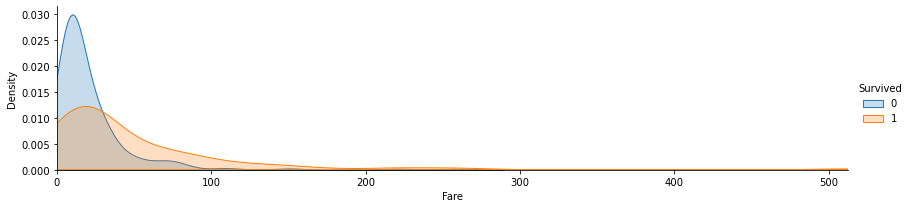

In [126]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()

#fare(17이하) : 0  
 "  (17크거나 30이하면 :1)  
    (30크거나 100이하면 :2)  
    (100보다 크면 3)  

In [127]:
#loc 1번째 방법
#train.loc[train['Fare']<= 17 ,'Fare2'] = 0
#train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30) ,'Fare2'] = 1
#train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100) ,'Fare2'] = 2
#train.loc[train['Fare']> 100  ,'Fare2'] = 3

In [128]:
train['Fare2'] = np.where(train['Fare'] < 17, 0,
                         np.where(train['Fare'] <= 30 , 1,
                                 np.where(train['Fare'] <=100 ,2,3)))

In [129]:
train['Fare2']

0      0
1      2
2      0
3      2
4      0
      ..
886    0
887    1
888    1
889    1
890    0
Name: Fare2, Length: 891, dtype: int32

In [130]:
train['Fare2'].value_counts()

0    496
2    181
1    161
3     53
Name: Fare2, dtype: int64

-

In [131]:
#가족모두 구하기 +1 나 포함 

In [134]:
train['FamilySize'] = train['SibSp'] + train['Parch']

In [135]:
train['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

-

In [ ]:
#방법1

In [138]:
family_size_list = train['FamilySize'].value_counts().index.values

In [139]:
family_size_list.sort()

In [140]:
family_size_list

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10], dtype=int64)

In [141]:
familysize_mapping = {}
for s,p in enumerate (family_size_list) :
    familysize_mapping[p] = round(s *0.4,2)

In [142]:
familysize_mapping

{0: 0.0, 1: 0.4, 2: 0.8, 3: 1.2, 4: 1.6, 5: 2.0, 6: 2.4, 7: 2.8, 10: 3.2}

In [174]:
for i,j in enumerate(["a","b","c"]) :
    print(i,j)

0 a
1 b
2 c


In [175]:
a = 1.456789

In [177]:
round(a,2 )

1.46

In [180]:
for value, key in enumerate(range(1, 12)) :
    print(round(value*0.4,1), key)
    print(value)

0.0 1
0
0.4 2
1
0.8 3
2
1.2 4
3
1.6 5
4
2.0 6
5
2.4 7
6
2.8 8
7
3.2 9
8
3.6 10
9
4.0 11
10


In [143]:
#방법2
#강사님 방법 / mapping을 하기 위한 딕셔너리만듬 
#family_mapping = {}

#for value, key in enumerate(range(1, 12)) :
    #print(round(value*0.4,1), key)
    #family_mapping[key] = round(value*0.4,1)

In [146]:
train['FamilySize2'] = train['FamilySize'].map(familysize_mapping)

In [147]:
train['FamilySize2'].value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
3.2      7
2.8      6
Name: FamilySize2, dtype: int64

In [148]:
train['FamilySize']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64

In [150]:
train[['Survived','Age2','Embarked2','Cabin2','Sex2','Fare2','FamilySize2']]

,Survived,Age2,Embarked2,Cabin2,Sex2,Fare2,FamilySize2
0,0,1,0,2.0,0,0,0.4
1,1,3,1,0.8,1,2,0.4
2,1,1,0,2.0,1,0,0.0
3,1,2,0,0.8,1,2,0.4
4,0,2,0,2.0,0,0,0.0
...,...,...,...,...,...,...,...
886,0,2,0,1.8,0,0,0.0
887,1,1,0,0.4,1,1,0.0
888,0,1,0,2.0,1,1,1.2
889,1,1,1,0.8,0,1,0.0


In [151]:
test = pd.read_csv('9D_titanic/test.csv')

In [152]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [153]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [154]:
#pcalss fare 중앙값

In [156]:
test.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [157]:
#위 중앙값을 fare null값에 넣기 

In [158]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace= True)

In [160]:
test['Fare'].mean()

35.56084545454542

In [161]:
test['Fare'].median()

14.4542

In [162]:
# 내가 모르느 거 정리

In [163]:
#.map 
#a = [1.2, 2.5, 3.7, 4.6]
#a = list(map(int, a))
#a
#[1, 2, 3, 4]